In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import re
from sklearn.metrics import pairwise
from insightface.app import FaceAnalysis

In [2]:
face_app = FaceAnalysis(name="buffalo_sc",
                        root="insightface_model",
                        providers=["CPUExecutionProviders"])

face_app.prepare(ctx_id=0, det_size=(640, 640))

c:\Users\Athif\OneDrive\Desktop\attendance-project\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CPUExecutionProviders' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


EP Error Unknown Provider Type: CPUExecutionProviders when using ['CPUExecutionProviders']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
EP Error Unknown Provider Type: CPUExecutionProviders when using ['CPUExecutionProviders']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [5]:
dir_lists = os.listdir("images")
dir_lists

['student-joe',
 'student-jon',
 'student-rob',
 'teacher-martin',
 'teacher-tyrion']

In [4]:
def clean_name(word):
    word = re.sub(r'[^a-zA-Z]', " ", word)
    word = word.title()
    return word

In [18]:
person_info = []

for dir_list in dir_lists:
    role, name = dir_list.split('-')

    for img in os.listdir(f"images/{dir_list}"):
        img_path = f"images/{dir_list}/{img}"
        img = cv2.imread(img_path)
        results = face_app.get(img, max_num=1)

        if len(results) > 0:
            for result in results:
                embedding = result["embedding"]
                person_info.append([name, role, embedding])


In [26]:
person_info

[['joe',
  'student',
  array([ 7.43379414e-01, -5.25995970e-01,  6.32884443e-01, -1.24196506e+00,
         -2.20475018e-01,  8.12119067e-01, -1.15428233e+00, -1.52210221e-02,
          3.46810269e+00, -2.33918691e+00, -1.66798270e+00,  8.77079606e-01,
          1.80874467e-02,  1.23686624e+00, -2.79842639e+00, -1.39629388e+00,
         -8.42707098e-01, -3.16891253e-01,  1.99579149e-01,  2.37756014e+00,
          7.97047436e-01,  5.23417532e-01, -4.68427598e-01,  2.67835438e-01,
          5.65023184e-01,  1.00522828e+00,  2.86058187e-02,  2.78623700e-01,
          2.75093985e+00, -2.40375310e-01,  1.58059978e+00, -8.96978498e-01,
         -4.58286762e-01,  2.00534120e-01,  2.49590397e+00,  1.33256102e+00,
          3.78767788e-01,  1.19971991e+00, -6.22886598e-01, -2.24105448e-01,
          4.23779696e-01,  4.78359193e-01,  1.37930393e-01, -1.28055406e+00,
         -8.23444247e-01, -1.33400306e-01, -5.68517566e-01, -9.79002833e-01,
          2.42946196e+00,  1.22211784e-01,  1.14531851

In [29]:
df = pd.DataFrame(person_info, columns=["name", "role", "feature"])
df

,name,role,feature
0,joe,student,"[0.7433794, -0.52599597, 0.63288444, -1.241965..."
1,joe,student,"[-0.6705178, -1.0788858, -1.156904, -1.6057901..."
2,joe,student,"[-0.14062944, -1.3130106, 0.66264147, 0.053164..."
3,joe,student,"[-1.1262792, -1.1930163, -0.5926257, -0.551641..."
4,joe,student,"[0.25712642, -1.267541, 0.084139764, -0.411764..."
5,joe,student,"[-2.0053103, -0.7248199, 2.7564719, -1.7607996..."
6,joe,student,"[0.16668518, -1.7802274, -0.14556298, -2.56176..."
7,joe,student,"[-2.1301966, -1.0258768, -0.4972496, -1.821450..."
8,joe,student,"[-0.6874978, -1.3496385, -0.22669765, -1.98991..."
9,joe,student,"[-1.7451499, -1.6675487, 0.10826075, -0.439916..."


In [36]:
img_test = cv2.imread("./test_images/rob.jpg")
cv2.imshow("Rob", img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
test_res = face_app.get(img_test, max_num=1)
test_res

[{'bbox': array([2083.2666 ,  522.86975, 3155.3843 , 1993.9841 ], dtype=float32),
  'kps': array([[2428.7507, 1095.4259],
         [2908.7273, 1086.4694],
         [2707.5073, 1378.7601],
         [2478.7356, 1628.2295],
         [2859.949 , 1624.4604]], dtype=float32),
  'det_score': 0.7774411,
  'embedding': array([-1.07230937e+00, -8.97238404e-02, -1.76865309e-01, -4.21975613e-01,
          1.53312743e-01,  1.10743260e+00,  1.06086910e+00,  2.07648754e-01,
          2.33790946e+00, -1.99657857e-01, -1.14411080e+00, -1.72549915e+00,
          1.21046066e-01,  1.43098450e+00, -5.60559109e-02,  2.74918866e+00,
         -3.28458875e-01,  7.42440224e-01,  4.02487516e-02,  3.05768460e-01,
         -2.53298134e-01, -6.39521837e-01,  1.36284637e+00,  1.49598598e+00,
          6.38673425e-01,  7.52456129e-01,  2.25650549e-01, -1.18153822e+00,
          2.18349695e-02,  1.02112901e+00,  9.39629972e-01,  2.21662700e-01,
          1.14178228e+00, -5.79891562e-01, -1.19062722e+00, -9.87071991e-0

In [47]:
for res in test_res:
    bbox  = res["bbox"]
    score = res["det_score"]
    embeds = res["embedding"]

In [39]:
bbox

array([2083.2666 ,  522.86975, 3155.3843 , 1993.9841 ], dtype=float32)

In [41]:
X_list = df["feature"].tolist()
X_list

[array([ 7.43379414e-01, -5.25995970e-01,  6.32884443e-01, -1.24196506e+00,
        -2.20475018e-01,  8.12119067e-01, -1.15428233e+00, -1.52210221e-02,
         3.46810269e+00, -2.33918691e+00, -1.66798270e+00,  8.77079606e-01,
         1.80874467e-02,  1.23686624e+00, -2.79842639e+00, -1.39629388e+00,
        -8.42707098e-01, -3.16891253e-01,  1.99579149e-01,  2.37756014e+00,
         7.97047436e-01,  5.23417532e-01, -4.68427598e-01,  2.67835438e-01,
         5.65023184e-01,  1.00522828e+00,  2.86058187e-02,  2.78623700e-01,
         2.75093985e+00, -2.40375310e-01,  1.58059978e+00, -8.96978498e-01,
        -4.58286762e-01,  2.00534120e-01,  2.49590397e+00,  1.33256102e+00,
         3.78767788e-01,  1.19971991e+00, -6.22886598e-01, -2.24105448e-01,
         4.23779696e-01,  4.78359193e-01,  1.37930393e-01, -1.28055406e+00,
        -8.23444247e-01, -1.33400306e-01, -5.68517566e-01, -9.79002833e-01,
         2.42946196e+00,  1.22211784e-01,  1.14531851e+00, -2.40696818e-01,
         2.0

In [42]:
X = np.array(X_list)

In [43]:
X

array([[ 0.7433794 , -0.52599597,  0.63288444, ..., -0.5139633 ,
        -0.08808407, -0.6596163 ],
       [-0.6705178 , -1.0788858 , -1.156904  , ...,  0.19186059,
        -0.6676867 , -0.48921043],
       [-0.14062944, -1.3130106 ,  0.66264147, ...,  0.20834121,
         0.20480174,  0.08312267],
       ...,
       [-0.76199913, -0.58028334, -0.28400463, ...,  0.64088976,
        -0.00573537,  0.0757277 ],
       [-0.9780669 , -0.45504403,  0.36304128, ...,  1.2260888 ,
         0.08752143,  0.92765486],
       [ 0.32457566, -1.5485997 ,  0.06924653, ...,  0.99624896,
        -0.8095118 ,  1.0227584 ]], dtype=float32)

In [44]:
X.shape

(39, 512)

In [48]:
embeds

array([-1.07230937e+00, -8.97238404e-02, -1.76865309e-01, -4.21975613e-01,
        1.53312743e-01,  1.10743260e+00,  1.06086910e+00,  2.07648754e-01,
        2.33790946e+00, -1.99657857e-01, -1.14411080e+00, -1.72549915e+00,
        1.21046066e-01,  1.43098450e+00, -5.60559109e-02,  2.74918866e+00,
       -3.28458875e-01,  7.42440224e-01,  4.02487516e-02,  3.05768460e-01,
       -2.53298134e-01, -6.39521837e-01,  1.36284637e+00,  1.49598598e+00,
        6.38673425e-01,  7.52456129e-01,  2.25650549e-01, -1.18153822e+00,
        2.18349695e-02,  1.02112901e+00,  9.39629972e-01,  2.21662700e-01,
        1.14178228e+00, -5.79891562e-01, -1.19062722e+00, -9.87071991e-02,
        1.17155027e+00, -1.47650898e-01,  2.31784105e+00, -7.62561321e-01,
       -2.27041364e+00,  1.12114108e+00, -2.19178319e-01,  8.77064019e-02,
        9.11565363e-01,  6.50443673e-01, -1.41107857e+00, -6.99055314e-01,
       -1.30367398e+00,  3.95182699e-01, -1.46448672e-01, -4.69500452e-01,
        1.45302331e+00,  

In [49]:
embeds.shape

(512,)

In [50]:
y = embeds.reshape(1, -1)
y.shape

(1, 512)

In [53]:
euclidean_distance = pairwise.euclidean_distances(X, y)
manhattan_distances = pairwise.manhattan_distances(X, y)
cosine_similarity = pairwise.cosine_similarity(X, y)

In [55]:
data_search = df.copy()
data_search["euclidean"] = euclidean_distance
data_search["manhattan"] = manhattan_distances
data_search["cosine"] = cosine_similarity

In [56]:
data_search

,name,role,feature,euclidean,manhattan,cosine
0,joe,student,"[0.7433794, -0.52599597, 0.63288444, -1.241965...",36.720905,670.337339,-0.057351
1,joe,student,"[-0.6705178, -1.0788858, -1.156904, -1.6057901...",37.213959,676.897680,-0.002077
2,joe,student,"[-0.14062944, -1.3130106, 0.66264147, 0.053164...",35.790001,639.995735,-0.008251
3,joe,student,"[-1.1262792, -1.1930163, -0.5926257, -0.551641...",33.837776,612.232242,0.084369
4,joe,student,"[0.25712642, -1.267541, 0.084139764, -0.411764...",37.674477,678.436367,-0.072936
5,joe,student,"[-2.0053103, -0.7248199, 2.7564719, -1.7607996...",35.819164,643.141250,0.024520
6,joe,student,"[0.16668518, -1.7802274, -0.14556298, -2.56176...",36.139286,649.967652,-0.075780
7,joe,student,"[-2.1301966, -1.0258768, -0.4972496, -1.821450...",34.033676,620.873340,0.059818
8,joe,student,"[-0.6874978, -1.3496385, -0.22669765, -1.98991...",36.487144,670.045813,-0.104265
9,joe,student,"[-1.7451499, -1.6675487, 0.10826075, -0.439916...",35.659195,649.306063,0.006344


In [57]:
import matplotlib.pyplot as plt

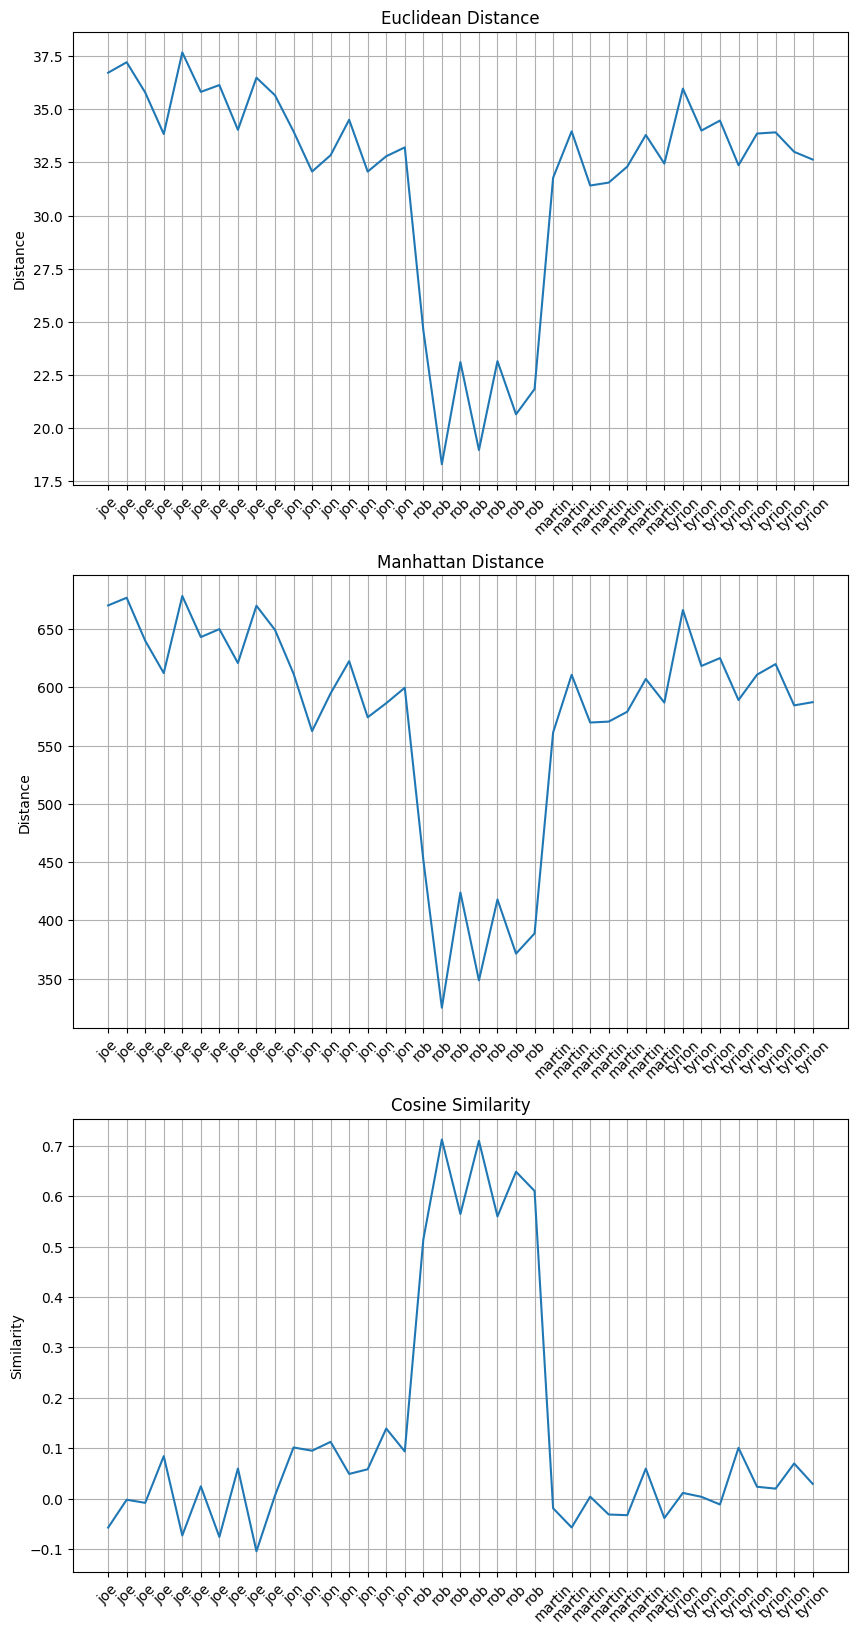

In [70]:
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.plot(data_search["euclidean"])
plt.grid()
plt.xticks(ticks=range(len(data_search)), labels=data_search["name"], rotation=45)
plt.title("Euclidean Distance")
plt.ylabel("Distance")

plt.subplot(3,1,2)
plt.plot(data_search["manhattan"])
plt.grid()
plt.xticks(ticks=range(len(data_search)), labels=data_search["name"], rotation=45)
plt.title("Manhattan Distance")
plt.ylabel("Distance")

plt.subplot(3,1,3)
plt.plot(data_search["cosine"])
plt.grid()
plt.xticks(ticks=range(len(data_search)), labels=data_search["name"], rotation=45)
plt.title("Cosine Similarity")
plt.ylabel("Similarity")
plt.show()